# Battle of Neighborhoods -Project

## Introduction
_This is an assignment as part of the Capstone Project which is part of the IBM Professional Data Science Course._

The task is to explore location data, find an imaginary problem that could be solved using available information and produce the result by extracting out required information using appropriate python data science libraries and methodologies. 

### Problem Statement
>Need effective advice to identify best kind (categories - Men's, Women's and Kids) of Clothing Store that can be opened in New York City. 

#### Background
One fine day, one of my close friends came to me and said, he had won the lottery ticket and would like to spend half of the money to charity and with the remaining amount he would like to invest in a clothing shop in New York. I congratulated him and encouraged his idea of opening the shop and suggested him to go ahead. Then our discussion went further on exploring different categories of clothing shops (such as Women's, Men's and Kids). Suddenly we started puzzling about how many shops are there in each category and what are the people's interests? and so on. We don't have any clue at all of these facts. But we realized one thing that all these data are very much important. 

#### Idea
Time was ticking and we had no clue on how to collect these data and solve the problem, then we decided to call our friend (Ankur) who was working as a Data Analyst. We explained the full details. He replied that he could help us by analyzing the data available on the Internet and also he ensured he would come up with the required information in a presentable format so that we could also understand his analysis in a simple manner. 

### Initial Analysis
Ankur started researching the data required to identify the best kind (categories - Men's, Women's and Kids) of Clothing stores that can be opened in New York City.

The followings are the list of data he shortlisted to figure out the answer.


| <p align="left"> Data </p> | <p align="left"> Purpose </p> |
| ----| ----|
| <p align="left"> Coordinates of New York Neighbours </p>   | <p align="left"> To plot the map to explain shops located in various places visually, so that his friends can grasp it easily. <br> Required data is available here in this link.https://cocl.us/new_york_dataset </p> |
| <p align="left"> List of venues | <p align="left"> To explore the lists of venues near to their city. <br> Use following Four Square API to get these data <br> https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={} <br> This would help in getting the list of shops and its location. </p>  |
| <p align="left"> Categories field in the previous API response </p> | <p align="left"> This would help in filtering only the shops required.</p>|
| <p align="left"> Details of venue </p> | <p align="left"> Use Four Square API which is there in following link <br> https://developer.foursquare.com/docs/api/venues/details <br> This would help in getting people's interest in various shops and their shopping time patterns and so on. </p> |

__Note:__ <br>
_Analyzing the data through various visualization approaches of data science methodology using appropriate python library is part of Ankur's plan_

***

$$ END-OF-PROBLEM-STATEMENT $$

***

$$ Capstone Project - The Battle of Neighborhoods - Week 2 Assignment - Starts $$

***

### Now imagine yourself as a data analyst assistant to the boss Ankur. Let's translate analysis into a nice python code. As a first step, Ankur is looking to import all libraries required to do the analysis. 

#### 1. Let's import all required libraries.

In [9]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### 2. Let's help Ankur to get coordinates required to analyze New York City areas. Just download using 'wget'.

In [10]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### 3. Let's unmarshal the content into JSON format. So that it will help Ankur's further plans to process the data. 

In [11]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

#### 4. Store the JSON data into the variable and check the first set of data before letting Ankur knew about the update. 

In [12]:
neighborhoods_data = newyork_data['features']

neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### 5. It's time to transform our data into python panda data frame. 

_Note: This is a popular library to do data manipulation and analysis._

In [13]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
# print top five rows to verify   
neighborhoods.head()


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### 5. Ankur is happy with our progress. Let's drill further, create an instance for the geocoder library to draw our first map which will depict the city areas of New York.

In [14]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### 6. Let's plot the map

In [15]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### 7.Let's plot the map for manhattan town where our boss's friends are residing in. That's the place they wanted to start their new business. We will need to extract more information in this area of New York City later. 

In [16]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


#### 8. Ankur is happy with the progress, we are ready to go ahead with further processing of data to find more details of the shops in this area. We would be using Four Square APIs for this purpose. Let's initialize the required credentials. 

In [21]:
CLIENT_ID = '153D4BSGW1NP1XLVV21HF3F1WZBFT4ARD0JV0CVT2VO0JGEQ' # your Foursquare ID
CLIENT_SECRET = 'VO0CAB0TGN5FUNDWGRAODZHT15U0C1IKPUSUZIWU2ORN2AFC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

Your credentails:
CLIENT_ID: 153D4BSGW1NP1XLVV21HF3F1WZBFT4ARD0JV0CVT2VO0JGEQ
CLIENT_SECRET:VO0CAB0TGN5FUNDWGRAODZHT15U0C1IKPUSUZIWU2ORN2AFC


#### 9. Before exploring Manhattan Neighbourhood in New York City using Four Square API, we will define some utility function required to parse the data.

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        if categories_list[0]['name'] == "Men's Store" || categories_list[0]['name'] == "Women's Store" || categories_list[0]['name'] == "Kids Store":
            return categories_list[0]['name']

In [148]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### 10. Call the util function to process the data of manhattan neighbors.

In [149]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


#### 11. Now our Boss (Ankur) finds out that, we have more data than it is required. Filtered data contains venues other than Men's, Women's and Kids Store.  Let's filter out only the required data. 

In [150]:
kids_result = manhattan_venues.loc[manhattan_venues['Venue Category'] == "Kids Store"]
women_result = manhattan_venues.loc[manhattan_venues['Venue Category'] == "Women's Store"]
men_result = manhattan_venues.loc[manhattan_venues['Venue Category'] == "Men's Store"]
frames = [kids_result, women_result, men_result]
result = pd.concat(frames)
result.head(50)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
19,Marble Hill,40.876551,-73.910660,4c852173dc018cfa2bc3e56c,The Children's Place,40.873672,-73.908156,Kids Store
191,Washington Heights,40.851903,-73.936900,4bd33cb241b9ef3b63a2ffe5,The Children's Place,40.849346,-73.933991,Kids Store
192,Washington Heights,40.851903,-73.936900,4ce80571f1c6236aba275df0,New York & Company,40.850205,-73.935750,Women's Store
535,Upper East Side,40.775639,-73.960508,52f68f0a498e04572a606719,Madewell,40.780066,-73.959598,Women's Store
657,Lenox Hill,40.768113,-73.958860,4f25c041e4b0b2f990cd8fc3,Anthropologie,40.769296,-73.961085,Women's Store
1140,Midtown,40.754691,-73.981669,4b4f714ff964a520d10627e3,BCBGMAXAZRIA,40.752310,-73.981357,Women's Store
1309,Chelsea,40.744035,-74.003116,4bc7990c15a7ef3b17bb79da,Anthropologie,40.741784,-74.004910,Women's Store
1597,Lower East Side,40.717807,-73.980890,4b75f0b5f964a520a9302ee3,7115 by Szeki - LES,40.719234,-73.985516,Women's Store
1761,Little Italy,40.719324,-73.997305,4f6e32dce4b07a4bc527a15b,American Two Shot,40.720344,-73.999724,Women's Store
1812,Little Italy,40.719324,-73.997305,49d807aef964a520955d1fe3,Madewell,40.721557,-73.999712,Women's Store


#### 12. Let's check the size of the filtered data.

In [151]:
result.shape

(31, 8)

#### 13. Let's figure out the count of clothing store per category per neighborhood.

In [154]:
grouped=result.groupby(['Neighborhood','Venue Category']).count()
grouped.drop(['Venue ID', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'], axis=1, inplace=True)
grouped

Venue
Neighborhood       Venue Category       
Battery Park City  Men's Store         1
                   Women's Store       3
Carnegie Hill      Women's Store       1
Chelsea            Men's Store         2
                   Women's Store       1
Civic Center       Men's Store         1
Financial District Women's Store       1
Flatiron           Women's Store       1
Lenox Hill         Women's Store       1
Little Italy       Women's Store       2
Lower East Side    Women's Store       1
Marble Hill        Kids Store          1
Midtown            Men's Store         1
                   Women's Store       1
Soho               Men's Store         3
                   Women's Store       4
Tribeca            Men's Store         3
Upper East Side    Women's Store       1
Washington Heights Kids Store          1
                   Women's Store       1

#### 14. Plot the bar chart for better visualization.

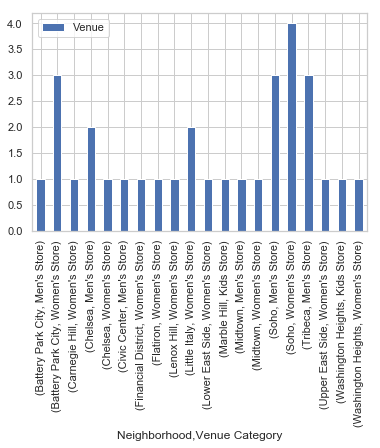

In [155]:
grouped.plot.bar()

#### 15. Let's see how many shops are there in each category across New York City. 

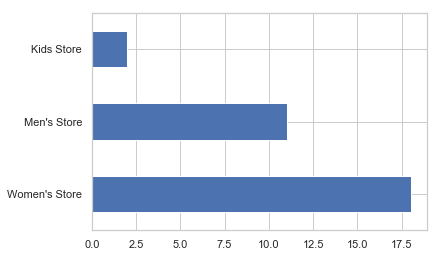

In [156]:
overall_count = result['Venue Category'].value_counts()
overall_count.plot.barh()

#### 16. Observation and analysis based on the above results are as follows:
With these data, we are sure that there are very few options for Kids Clothing across the Manhattan region. 

_It could be a good idea if our boss's friend opens up a Kids Store._

There are already quite a few shops that are there for Women's and Men's. So, if they open up a new shop in those categories, then they might end up facing heavy competition from others. 

**"Less competition, lesser the risks".** Also, with our boss previous project, he is aware that there are many kids in that region. That could pull the crowd. 

#### 17. Let's dig a few more information on Kids store. We have the list of kids store results from our previous iteration as below.

In [158]:
kids_result

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
19,Marble Hill,40.876551,-73.91066,4c852173dc018cfa2bc3e56c,The Children's Place,40.873672,-73.908156,Kids Store
191,Washington Heights,40.851903,-73.93690,4bd33cb241b9ef3b63a2ffe5,The Children's Place,40.849346,-73.933991,Kids Store


In [164]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
VENUE_ID = '4c852173dc018cfa2bc3e56c'
url = 'https://api.foursquare.com/v2/venues/4c852173dc018cfa2bc3e56c?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
)
url # display URL

'https://api.foursquare.com/v2/venues/4c852173dc018cfa2bc3e56c?&client_id=153D4BSGW1NP1XLVV21HF3F1WZBFT4ARD0JV0CVT2VO0JGEQ&client_secret=VO0CAB0TGN5FUNDWGRAODZHT15U0C1IKPUSUZIWU2ORN2AFC&v=20180605'

In [165]:
venue_results = requests.get(url).json()
venue_results

{'meta': {'code': 200, 'requestId': '5e35583969babe001b6cbbaf'},
 'response': {'venue': {'id': '4c852173dc018cfa2bc3e56c',
   'name': "The Children's Place",
   'contact': {'phone': '7182208391',
    'formattedPhone': '(718) 220-8391',
    'twitter': 'childrensplace',
    'facebook': '46687203018',
    'facebookUsername': 'childrensplace',
    'facebookName': "The Children's Place"},
   'location': {'address': '44 W 225th St',
    'lat': 40.873671591133125,
    'lng': -73.90815619608166,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.873671591133125,
      'lng': -73.90815619608166}],
    'postalCode': '10463',
    'cc': 'US',
    'city': 'Bronx',
    'state': 'NY',
    'country': 'United States',
    'formattedAddress': ['44 W 225th St', 'Bronx, NY 10463', 'United States']},
   'canonicalUrl': 'https://foursquare.com/v/the-childrens-place/4c852173dc018cfa2bc3e56c',
   'categories': [{'id': '4bf58dd8d48988d105951735',
     'name': 'Kids Store',
     'pluralName': 'Kids Sto